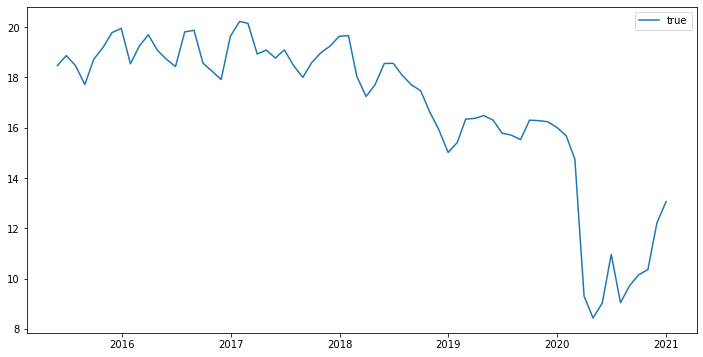

C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


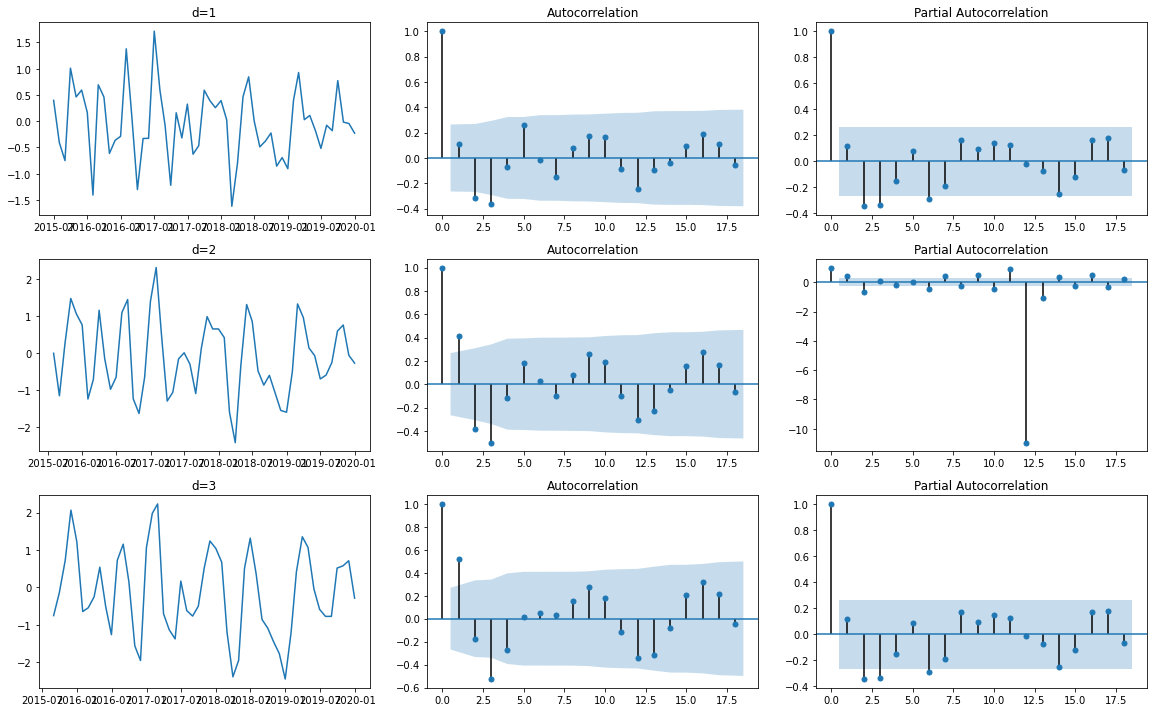

                        0             1
0                     ADF -6.661069e+00
1                 p-value  4.845698e-09
2                 usedlag  2.000000e+00
3                    nobs  5.200000e+01
4   Critical values at 1% -3.562879e+00
5   Critical values at 5% -2.918973e+00
6  Critical values at 10% -2.597393e+00
7                  icbest  7.930199e+01
                        0             1
0                     ADF -8.744274e+00
1                 p-value  2.951608e-14
2                 usedlag  1.000000e+00
3                    nobs  5.200000e+01
4   Critical values at 1% -3.562879e+00
5   Critical values at 5% -2.918973e+00
6  Critical values at 10% -2.597393e+00
7                  icbest  8.531172e+01
                        0          1
0                     ADF  -2.623331
1                 p-value   0.088271
2                 usedlag   6.000000
3                    nobs  46.000000
4   Critical values at 1%  -3.581258
5   Critical values at 5%  -2.926785
6  Critical values at

In [4]:
# !pip install investpy
import investpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.unicode.east_asian_width', True)

# データの取得・加工
df = investpy.get_stock_historical_data(stock="APLE", country="united states", from_date="01/01/2010", to_date="01/01/2021")
df = df.resample("M").mean()
y = df["Close"]
y_train = y[y.index <  "01/01/2020"]
y_valid = y[y.index >= "01/01/2020"]

# Date
# 2010-01-31     289.581053
# 2010-02-28     267.704211
# 2010-03-31     280.786087
# 2010-04-30     278.801905
# 2010-05-31     248.908500
#                  ...     
# 2020-08-31    1545.019524
# 2020-09-30    1511.502381
# 2020-10-31    1541.920909
# 2020-11-30    1743.390000
# 2020-12-31    1767.710909
# Freq: M, Name: Close, Length: 132, dtype: float64



fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(y.index, y, label="true")
plt.legend()
plt.savefig("ar_plot.png")
plt.show()



from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y_lag1 = y_train.diff(1).dropna()
y_lag2 = y_train.diff(2).dropna()
y_lag3 = y_train.diff(3).dropna()

fig, axes = plt.subplots(3,3,figsize=(16,10))
axes[0][0].plot(y_lag1)
axes[0][0].set_title("d=1")
plot_acf(y_lag1,  ax=axes[0][1])
plot_pacf(y_lag1, ax=axes[0][2])
axes[1][0].plot(y_lag2)
axes[1][0].set_title("d=2")
plot_acf(y_lag2,  ax=axes[1][1])
plot_pacf(y_lag2, ax=axes[1][2])
axes[2][0].plot(y_lag3)
axes[2][0].set_title("d=3")
plot_acf(y_lag3,  ax=axes[2][1])
plot_pacf(y_lag1, ax=axes[2][2])
plt.tight_layout()
# plt.savefig("arima_acf.png")
plt.show()



# ADF検定
from statsmodels.tsa.stattools import adfuller

adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(y_lag1, autolag="AIC")
print(pd.DataFrame([["ADF",adf],
                    ["p-value",pvalue],
                    ["usedlag",usedlag],
                    ["nobs",nobs],
                    ["Critical values at 1%",critical_values["1%"]],
                    ["Critical values at 5%",critical_values["5%"]],
                    ["Critical values at 10%",critical_values["10%"]],
                    ["icbest",icbest]]))
#                         0            1
# 0                     ADF    -3.658745
# 1                 p-value     0.004732
# 2                 usedlag    10.000000
# 3                    nobs   108.000000
# 4   Critical values at 1%    -3.492401
# 5   Critical values at 5%    -2.888697
# 6  Critical values at 10%    -2.581255
# 7                  icbest  1013.981789

adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(y_lag2, autolag="AIC")
print(pd.DataFrame([["ADF",adf],
                    ["p-value",pvalue],
                    ["usedlag",usedlag],
                    ["nobs",nobs],
                    ["Critical values at 1%",critical_values["1%"]],
                    ["Critical values at 5%",critical_values["5%"]],
                    ["Critical values at 10%",critical_values["10%"]],
                    ["icbest",icbest]]))
#                         0            1
# 0                     ADF    -3.778382
# 1                 p-value     0.003136
# 2                 usedlag     9.000000
# 3                    nobs   108.000000
# 4   Critical values at 1%    -3.492401
# 5   Critical values at 5%    -2.888697
# 6  Critical values at 10%    -2.581255
# 7                  icbest  1007.803755

adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(y_lag3, autolag="AIC")
print(pd.DataFrame([["ADF",adf],
                    ["p-value",pvalue],
                    ["usedlag",usedlag],
                    ["nobs",nobs],
                    ["Critical values at 1%",critical_values["1%"]],
                    ["Critical values at 5%",critical_values["5%"]],
                    ["Critical values at 10%",critical_values["10%"]],
                    ["icbest",icbest]]))
#                         0            1
# 0                     ADF    -3.139597
# 1                 p-value     0.023758
# 2                 usedlag    13.000000
# 3                    nobs   103.000000
# 4   Critical values at 1%    -3.495493
# 5   Critical values at 5%    -2.890037
# 6  Critical values at 10%    -2.581971
# 7                  icbest  1010.257562

In [ ]:
from statsmodels.tsa.arima.model import AR

min_p = 0
max_p = 3
min_q = 0
max_q = 3
order = []
for p in range(min_p,max_p+1):
    for q in range(min_q, max_q+1):
        model = ARIMA(endog = y_train, order=(p, 2, q))
        result = model.fit()
        order.append([p,2,q,result.aic])
order_df = pd.DataFrame(order,columns=["p","d","q","AIC"])
print(order_df.sort_values("AIC"))

#     p  d  q          AIC
# 13  3  2  1  1152.060542
# 11  2  2  3  1152.532830
# 14  3  2  2  1153.261149
# 15  3  2  3  1154.423228
# 9   2  2  1  1157.364098
# 2   0  2  2  1158.080616
# 5   1  2  1  1159.391173
# 3   0  2  3  1160.050772
# 6   1  2  2  1160.077660
# 7   1  2  3  1160.920801
# 10  2  2  2  1162.655787
# 1   0  2  1  1163.991461
# 12  3  2  0  1183.572301
# 8   2  2  0  1197.695468
# 4   1  2  0  1200.585802
# 0   0  2  0  1207.754860



model = ARIMA(endog = y_train, order=(3, 2, 1))
result = model.fit()
print(result.summary())
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                  Close   No. Observations:                  120
# Model:                 ARIMA(3, 2, 1)   Log Likelihood                -571.030
# Date:                Thu, 12 May 2022   AIC                           1152.061
# Time:                        02:05:13   BIC                           1165.914
# Sample:                    01-31-2010   HQIC                          1157.685
#                          - 12-31-2019                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.2167      0.086      2.516      0.012       0.048       0.386
# ar.L2         -0.1270      0.077     -1.655      0.098      -0.277       0.023
# ar.L3         -0.2502      0.101     -2.487      0.013      -0.447      -0.053
# ma.L1         -0.9726      0.034    -28.274      0.000      -1.040      -0.905
# sigma2       907.8785     99.791      9.098      0.000     712.292    1103.465
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 4.91
# Prob(Q):                              0.74   Prob(JB):                         0.09
# Heteroskedasticity (H):               4.94   Skew:                             0.18
# Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
# ===================================================================================

# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).



predict_train = result.get_prediction(start=0,end=y_train.shape[0])
predict_inf_train = predict_train.summary_frame(alpha=0.05)
print(predict_inf_train)
# Close              mean      mean_se  mean_ci_lower  mean_ci_upper
# 2010-01-31     0.000000  1414.779880   -2772.917610    2772.917610
# 2010-02-28   434.424767   708.215471    -953.652049    1822.501584
# 2010-03-31   245.975492    40.019180     167.539340     324.411643
# 2010-04-30   284.508962    38.525472     209.000425     360.017499
# 2010-05-31   274.693258    37.695718     200.811007     348.575508
# ...                 ...          ...            ...            ...
# 2019-09-30  1208.306716    30.132494    1149.248113    1267.365320
# 2019-10-31  1219.423098    30.132415    1160.364650    1278.481545
# 2019-11-30  1233.704046    30.132339    1174.645747    1292.762346
# 2019-12-31  1320.021502    30.132268    1260.963343    1379.079662
# 2020-01-31  1351.173005    30.132200    1292.114978    1410.231032

# [121 rows x 4 columns]

predict_valid = result.get_prediction(start=y_train.shape[0],end=y_train.shape[0]+y_valid.shape[0])
predict_inf_valid = predict_valid.summary_frame(alpha=0.05)
print(predict_inf_valid)
# Close              mean     mean_se  mean_ci_lower  mean_ci_upper
# 2020-01-31  1351.173005   30.132200    1292.114978    1410.231032
# 2020-02-29  1344.556549   48.099201    1250.283847    1438.829252
# 2020-03-31  1345.933869   60.131207    1228.078870    1463.788869
# 2020-04-30  1358.164902   66.388598    1228.045640    1488.284164
# 2020-05-31  1375.935287   71.145921    1236.491844    1515.378730
# 2020-06-30  1391.527711   76.173119    1242.231140    1540.824281
# 2020-07-31  1403.229188   82.130594    1242.256182    1564.202194
# 2020-08-31  1412.978267   88.411018    1239.695856    1586.260678
# 2020-09-30  1423.343318   94.417702    1238.288022    1608.398613
# 2020-10-31  1435.063270   99.993752    1239.079118    1631.047422
# 2020-11-30  1447.487055  105.345131    1241.014392    1653.959718
# 2020-12-31  1459.737175  110.680296    1242.807782    1676.666569
# 2021-01-31  1471.521297  116.074820    1244.018829    1699.023764



fig,ax = plt.subplots(1,1,figsize=(18,6))
ax.plot(y.index[2:], y[2:], label="true")
ax.plot(predict_inf_train.index[2:], predict_inf_train["mean"][2:], color="r", label="train")
ax.fill_between(predict_inf_train.index[2:], 
                 predict_inf_train["mean_ci_upper"][2:], 
                 predict_inf_train["mean_ci_lower"][2:], 
                 alpha=0.1, color="r")
ax.plot(predict_inf_valid.index, predict_inf_valid["mean"], color="g", label="valid")
ax.fill_between(predict_inf_valid.index, 
                 predict_inf_valid["mean_ci_upper"], 
                 predict_inf_valid["mean_ci_lower"], 
                 alpha=0.1, color="g")
ax.legend()
plt.savefig("arima_predict.png")
plt.show()